<a href="https://colab.research.google.com/github/G0nkly/pytorch_sandbox/blob/main/primer/NN/PyTorch_NN_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Overview**
###### AI vs ML vs NN vs DL
---

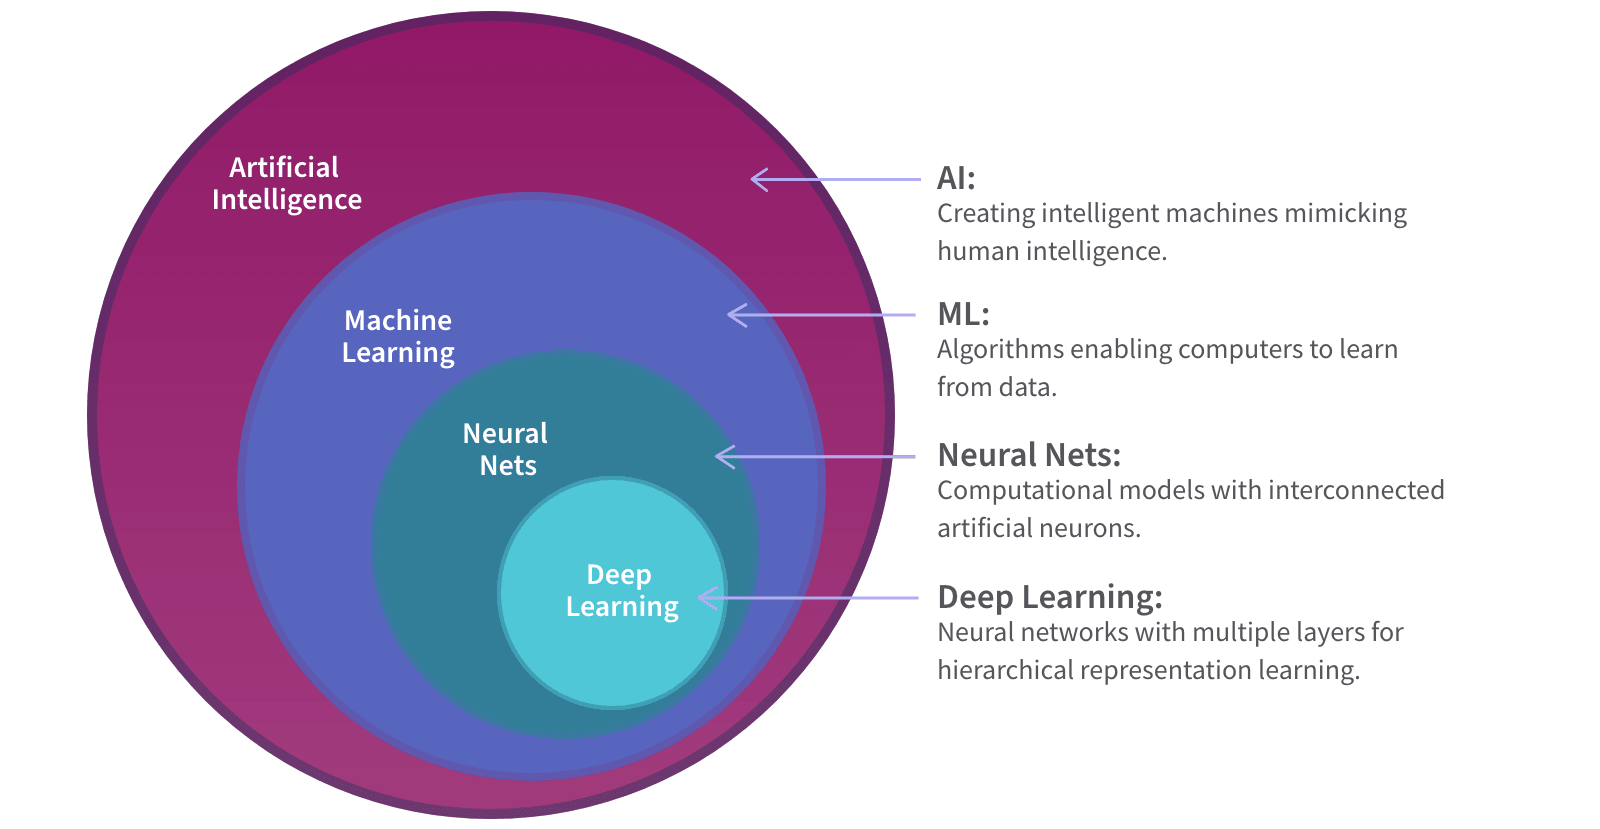

---
Sources:
* https://www.qlik.com/us/augmented-analytics/machine-learning-vs-ai

# **Why? What can we do with it**


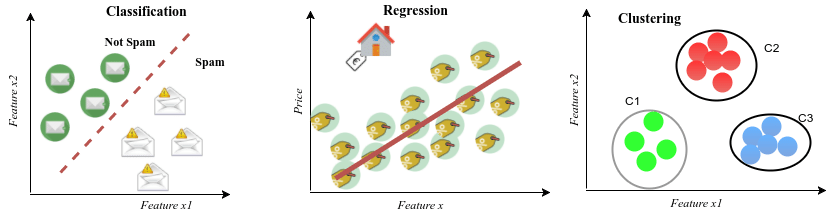


| Aspect                 | **Classification**                           | **Regression**                        | **Clustering**                              |
| ---------------------- | -------------------------------------------- | ------------------------------------- | ------------------------------------------- |
| **Task**               | Predict a discrete class label               | Predict a continuous value            | Group similar inputs without labels         |
| **Labels**             | Categories (e.g., `cat`, `dog`, `0/1/2`)     | Real numbers (e.g., `3.5`, `-0.2`)    | ❌ Not required (unsupervised learning)      |
| **Output**             | Class probabilities (softmax/sigmoid output) | A single number (or vector of values) | Typically a learned embedding or cluster ID |
| **Activation (final)** | **Sigmoid** (binary) / **Softmax** (multi)   | **None** (linear output)              | None (output used for distance comparison)  |
| **Loss Function**      | Binary/Multi-class Cross-Entropy             | Mean Squared Error (MSE), MAE         | Cluster-specific (e.g., k-means inertia)    |
| **Evaluation Metric**  | Accuracy, F1, AUC                            | MAE, RMSE, R²                         | Silhouette score, intra-cluster variance    |
| **Example**            | Is email spam? What digit is this?           | Predict house price                   | Group customers by purchasing behavior      |
| **Supervised?**        | ✅ Yes                                        | ✅ Yes                                 | ❌ No                                        |



# **Goal - (roughly) Understanding this picture**

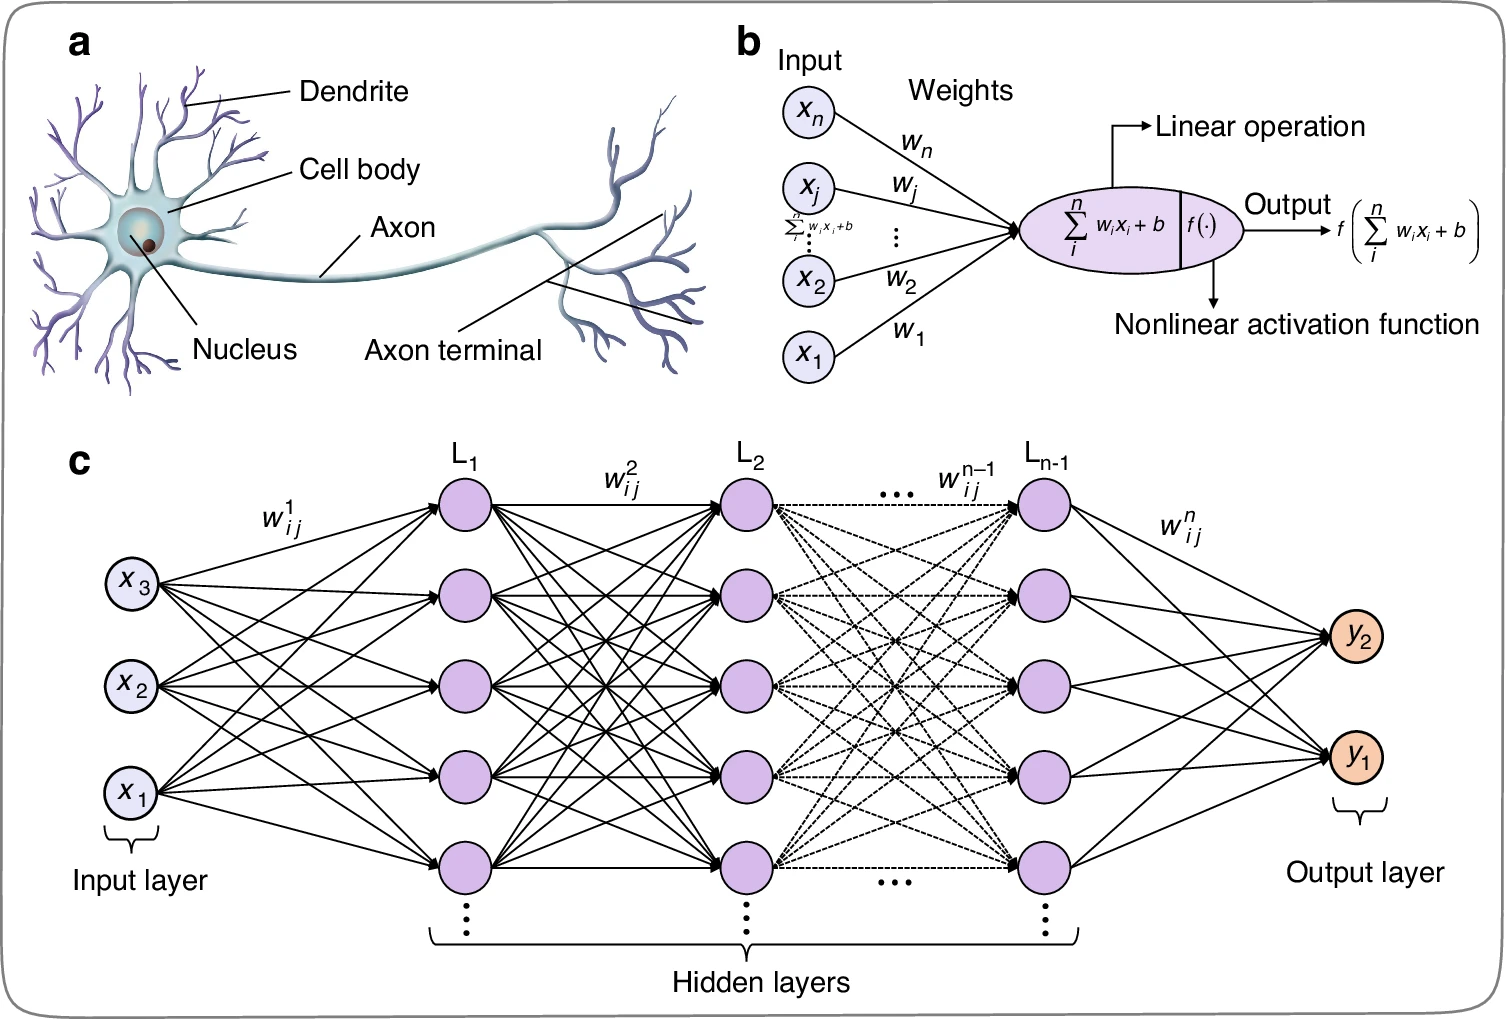

Source: https://www.nature.com/articles/s41377-024-01590-3/figures/3



In [3]:
###########################
# FAMILIARITY WITH PYTHON #
###########################

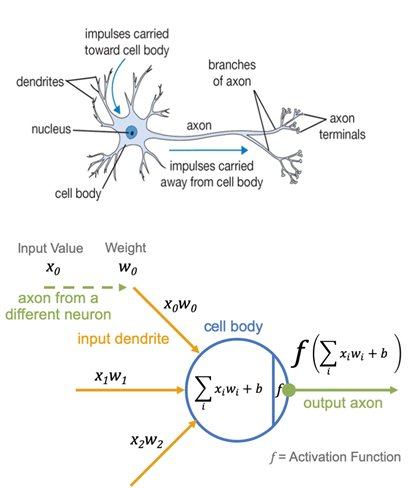

In [ ]:
######################################################
# A SIMPLE (FORWARD-PASS-ONLY) NEURON IN PURE PYTHON #
######################################################

**Takeaway Building blocks**:


*   Neuron ✓
*   Weights + Bias ✓
*   Forward Pass ✓
*   Activation Function(s) ✓



In [ ]:
#!! 1. Introducing Non-linearity:
# Neural networks without activation functions are essentially just a series of linear transformations, incapable of capturing complex patterns.
# Activation functions introduce non-linearity, enabling the network to learn non-linear relationships in data.
# This allows the network to model more complex functions and make more sophisticated predictions.
#!! 2. Enabling Learning:
# Differentiable activation functions are crucial for the learning process in neural networks.
# They allow for the calculation of gradients, which are essential for updating weights and biases during training.
# Without differentiability, the learning process would be inefficient and unreliable.
#!! 3. Stabilizing Training:
# Activation functions can help map input data to a known range, such as 0 to 1 or -1 to 1.
# This helps stabilize the training process and prevent issues like vanishing gradients.
#!! 4. Improving Efficiency:
# Differentiable activation functions provide a clear path for optimization algorithms like gradient descent.
# This efficiency is particularly important for training deep neural networks, where computational costs are significant. import math

import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)

def relu(x):
    return max(0, x)

def identity(x):
    return x


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

def plot_sigmoid():
    # Generate 100 equally spaced values from -10 to 10
    x = np.linspace(-10, 10, 100)
    # Compute the sigmoid function values
    y = 1 / (1 + np.exp(-x))

    plt.plot(x, y)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('Sigmoidal Activation Function')
    plt.grid(True)
    plt.show()


def plot_tanh():
    # Generate values for x
    x = np.linspace(-10, 10, 100)

    # Compute tanh values for corresponding x
    tanh = np.tanh(x)

    # Plot the tanh function
    plt.plot(x, tanh)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('Tanh Activation Function')
    plt.grid(True)
    plt.show()


def plot_relu():
    # Generate values for x
    x = np.linspace(-10, 10, 100)

    # Compute ReLU values for corresponding x
    relu = np.maximum(0, x)

    # Plot the ReLU function
    plt.plot(x, relu)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('ReLU Activation Function')
    plt.grid(True)
    plt.show()


def plot_leaky_relu():
    # Generate values for x
    x = np.linspace(-10, 10, 100)

    # Define the leaky ReLU function
    def leaky_relu(x, alpha=0.1):
        return np.where(x >= 0, x, alpha * x)

    # Compute leaky ReLU values for corresponding x
    leaky_relu_values = leaky_relu(x)

    # Plot the leaky ReLU function
    plt.plot(x, leaky_relu_values)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('Leaky ReLU Activation Function')
    plt.grid(True)
    plt.show()


def plot_softmax():
    class_labels = ["Class A", "Class B", "Class C"]
    probabilities = np.array([0.2, 0.3, 0.5])
    plt.bar(class_labels, probabilities)
    plt.xlabel("Classes")
    plt.ylabel("Probability")
    plt.title("Softmax Activation Function")
    plt.show()

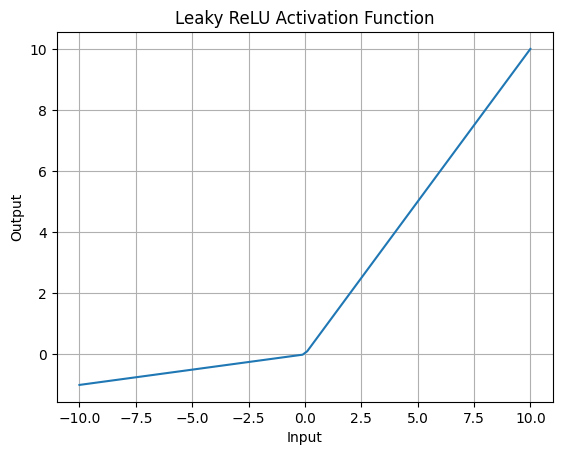

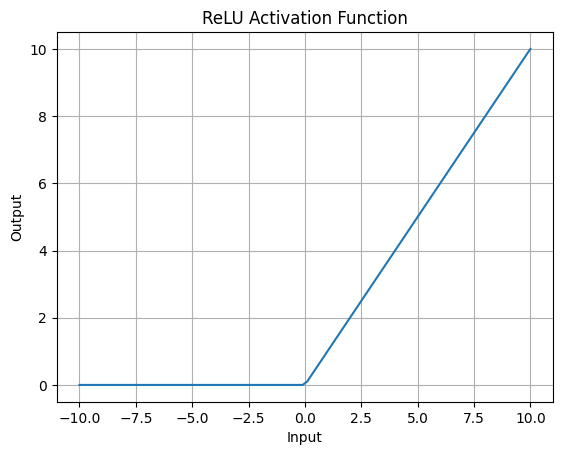

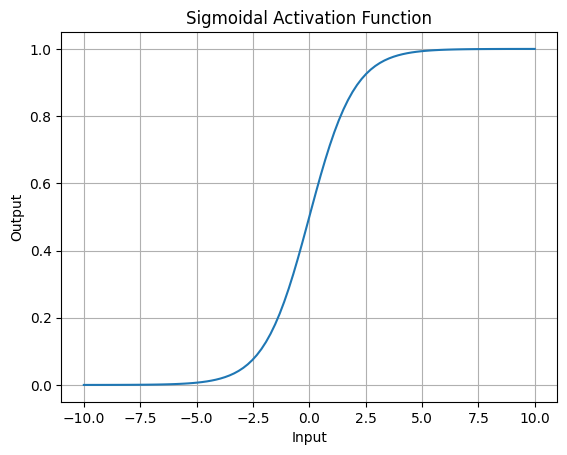

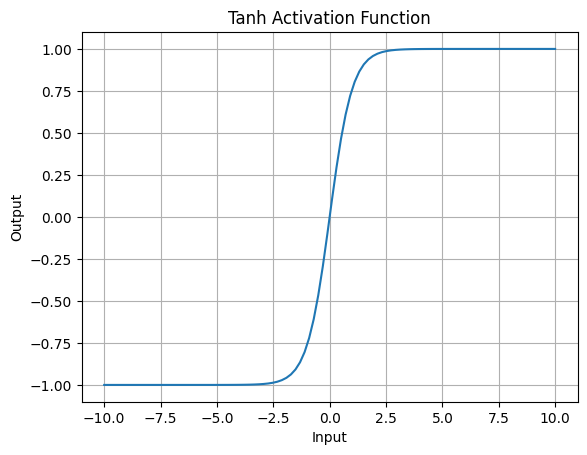

(None, None, None, None)

In [ ]:
plot_leaky_relu(), plot_relu(), plot_sigmoid(), plot_tanh()

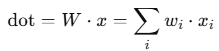

In [ ]:
# Vector as list
x = [2.0, 3.0]        # input vector
w = [0.5, -1.0]       # weight vector

# Dot product: sum(x[i] * w[i])
dot = sum(xi * wi for xi, wi in zip(x, w))  # = (2.0 * 0.5 + 3.0 * -1.0) = 1.0 - 3.0 = -2.0


In [ ]:
class Neuron:
    def __init__(self, n_inputs, activation=sigmoid):
        # Initialize weights and bias
        self.weights = [0.0] * n_inputs
        self.bias = 0.0
        self.activation = activation

    def forward(self, inputs):
        # Weighted sum + bias
        z = sum(w * x for w, x in zip(self.weights, inputs)) + self.bias
        return self.activation(z)

In [ ]:
n = Neuron(3, activation=sigmoid)
n.weights = [0.5, -0.6, 0.1]
n.bias = 0.0

output = n.forward([1.0, 2.0, 3.0])
print(f"Neuron output: {output}")


Neuron output: 0.401312339887548


In [ ]:
############################################################
# A SIMPLE NEURON IN PURE PYTHON (FORWARD / BACKWARD PASS) #
############################################################

**Takeaway Building blocks**:


*   Loss / Loss-function ✓
*   Backward Pass ✓
*   Gradient ✓
*   Concept of an optimizer ✓
*   "Training" ✓
  * Epochs, Train/Test (data) set



In [24]:
import math
import random

class SigmoidNeuron:
    def __init__(self, input_size):
        self.weights = [random.uniform(-1, 1) for _ in range(input_size)]
        self.bias = random.uniform(-1, 1)

        # Store gradients
        self.grad_weights = [0.0 for _ in range(input_size)]
        self.grad_bias = 0.0

    def sigmoid(self, z):
        return 1 / (1 + math.exp(-z))

    def forward(self, x):
        self.last_input = x
        z = sum(wi * xi for wi, xi in zip(self.weights, x)) + self.bias
        self.last_output = self.sigmoid(z)
        return self.last_output

    def backward(self, y_true):
        """
        Computes gradients but does NOT update weights.
        """
        y_pred = self.last_output
        x = self.last_input

        # Step 1: dL/dy_pred (loss = (y_pred - y_true)^2)
        d_loss_d_pred = 2 * (y_pred - y_true)

        # Step 2: dy_pred/dz (sigmoid derivative)
        d_pred_d_z = y_pred * (1 - y_pred)

        # Step 3: chain rule: dL/dz
        d_loss_d_z = d_loss_d_pred * d_pred_d_z

        # Step 4: compute and store gradients
        self.grad_weights = [d_loss_d_z * xi for xi in x]
        self.grad_bias = d_loss_d_z

        # Return loss value
        return (y_pred - y_true) ** 2

    def step(self, lr=0.1):
        """
        Applies gradient descent update using stored gradients.
        """
        self.weights = [w - lr * gw for w, gw in zip(self.weights, self.grad_weights)]
        self.bias -= lr * self.grad_bias


## Chain Rule Breakdown: Backpropagation for a Sigmoid Neuron

We compute the gradient step-by-step using the chain rule:

---

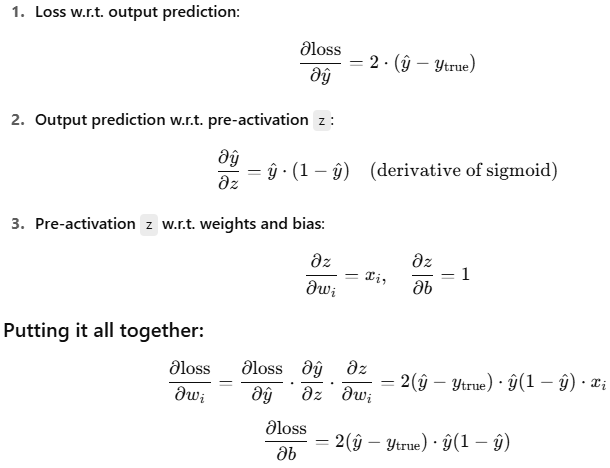


| Step | What It Computes                                  | Purpose                               |
| ---- | ------------------------------------------------- | ------------------------------------- |
| 1    | $2(\hat{y} - y)$                                  | How wrong the prediction is           |
| 2    | $\hat{y}(1 - \hat{y})$                            | How sensitive the sigmoid output is   |
| 3    | Multiply those → $\frac{dL}{dz}$                  | Combined sensitivity of the neuron    |
| 4    | Multiply by inputs $x_i$ to get $\frac{dL}{dw_i}$ | How much each weight affects the loss |
| 5    | Use gradients to update weights and bias          | Learn from mistakes                   |


# Reminder: Classification vs. Regression

| Task Type          | What it Predicts      | Example Output     | Typical Activation | Example Loss Function    |
| ------------------ | --------------------- | ------------------ | ------------------ | ------------------------ |
| **Regression**     | A real-valued number  | 2.35, -0.8, 150.0  | None (linear)      | Mean Squared Error (MSE) |
| **Classification** | A label / class index | Yes/No, 0/1, "dog" | Sigmoid / Softmax  | Cross-Entropy            |


Epoch 0, Loss: 0.0388
Epoch 100, Loss: 0.0008
Epoch 200, Loss: 0.0011
Epoch 300, Loss: 0.0016
Epoch 400, Loss: 0.0035
Epoch 500, Loss: 0.0002
Epoch 600, Loss: 0.0010
Epoch 700, Loss: 0.0000
Epoch 800, Loss: 0.0001
Epoch 900, Loss: 0.0025
Epoch 1000, Loss: 0.0001
Epoch 1100, Loss: 0.0002
Epoch 1200, Loss: 0.0002
Epoch 1300, Loss: 0.0003
Epoch 1400, Loss: 0.0004
Epoch 1500, Loss: 0.0001
Epoch 1600, Loss: 0.0000
Epoch 1700, Loss: 0.0037
Epoch 1800, Loss: 0.0002
Epoch 1900, Loss: 0.0045


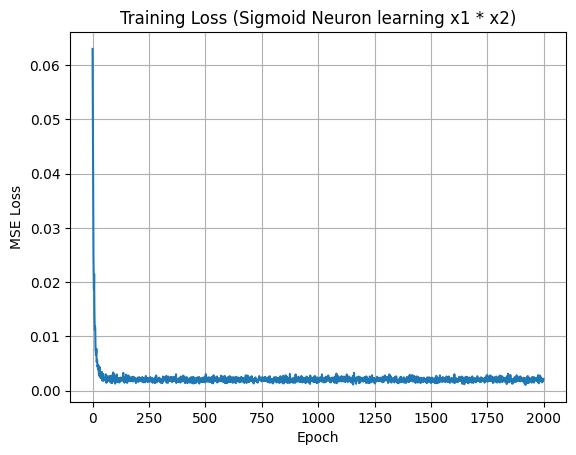

In [29]:
import random

neuron = Neuron(n_inputs=2)
losses = []

for epoch in range(2000):
    total_loss = 0.0
    for _ in range(100):  # mini-batch
        x1 = random.uniform(0, 1)
        x2 = random.uniform(0, 1)
        x = [x1, x2]
        y_true = x1 * x2  # new target: product

        y_pred = neuron.forward(x)
        loss = neuron.backward(y_true)
        neuron.step(learning_rate=0.5)
        total_loss += loss
    if epoch % 100 == 0:
      print(f"Epoch {epoch}, Loss: {loss:.4f}")

    losses.append(total_loss / 100)

# Plot loss
plt.plot(losses)
plt.title("Training Loss (Sigmoid Neuron learning x1 * x2)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

In [28]:
test_input = [0.8, 0.7]
predicted = neuron.forward(test_input)
true_product = test_input[0] * test_input[1]
print(f"Input: {test_input}, Predicted Product: {predicted:.3f}, True Product: {true_product:.3f}")


Input: [0.8, 0.7], Predicted Product: 0.563, True Product: 0.560


In [ ]:
import random
import matplotlib.pyplot as plt

class LinearNeuron:
    def __init__(self, n_inputs):
        self.weights = [random.uniform(-1, 1) for _ in range(n_inputs)]
        self.bias = random.uniform(-1, 1)

    def forward(self, inputs):
        self.inputs = inputs
        self.z = sum(w * x for w, x in zip(self.weights, inputs)) + self.bias
        self.output = self.z  # No activation
        return self.output

    def backward(self, target):
        # Mean squared error: L = (output - target)^2
        prediction = self.output
        error = prediction - target  # dL/dy
        delta = error                # dy/dz = 1 for linear output

        self.d_weights = [delta * x for x in self.inputs]
        self.d_bias = delta
        return error ** 2  # squared error for loss tracking

    def step(self, learning_rate=0.1):
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * self.d_weights[i]
        self.bias -= learning_rate * self.d_bias

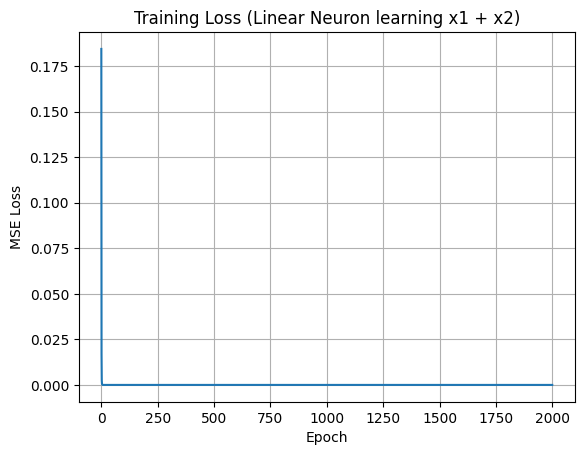

In [ ]:
neuron = LinearNeuron(n_inputs=2)
losses = []

for epoch in range(2000):
    total_loss = 0.0
    for _ in range(100):  # mini-batch
        x1 = random.uniform(0, 1)
        x2 = random.uniform(0, 1)
        x = [x1, x2]
        y_true = x1 + x2

        y_pred = neuron.forward(x)
        loss = neuron.backward(y_true)
        neuron.step(learning_rate=0.1)
        total_loss += loss

    losses.append(total_loss / 100)  # average batch loss

# Plotting
plt.plot(losses)
plt.title("Training Loss (Linear Neuron learning x1 + x2)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

In [ ]:
test_input = [0.8, 20.7]
predicted = neuron.forward(test_input)
print(f"Input: {test_input}, Predicted Sum: {predicted:.2f}, True Sum: {sum(test_input):.2f}")


Input: [0.8, 20.7], Predicted Sum: 21.50, True Sum: 21.50
